In [64]:
!pip install pydrive
!git clone https://github.com/thtrieu/darkflow.git
!pip install Cython 
!pip install pytube
!pip install PyDrive


import os
os.chdir('/content/darkflow')
!pwd

!pip install -e .

fatal: destination path 'darkflow' already exists and is not an empty directory.
/content/darkflow
Obtaining file:///content/darkflow
  Found existing installation: darkflow 1.0.0
    Can't uninstall 'darkflow'. No files were found to uninstall.
  Running setup.py develop for darkflow


In [0]:
import pydrive
import time
from tqdm import tqdm
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from google.colab import files
from oauth2client.client import GoogleCredentials

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)


# load training weights

newpath = '/content/darkflow/bin'
if not os.path.exists(newpath):
  os.makedirs(newpath)
download = drive.CreateFile({'id': '1J-GZ6mvhu12j19zZtq9fTbnyJeCgxE0g'}) # insert the fild ID here
download.GetContentFile('/content/darkflow/bin/yolov.weights')


In [0]:
from darkflow.net.build import TFNet
import cv2
import matplotlib.pyplot as plt

In [0]:
options = {
    'model': 'cfg/yolo.cfg',
    'load': 'bin/yolov.weights',
    'threshold': 0.3,
    'gpu' : 1.0
          }

In [68]:
tfnet = TFNet(options)

/content/darkflow/darkflow/dark/darknet.py:54: UserWarning: ./cfg/yolov.cfg not found, use cfg/yolo.cfg instead
  cfg_path, FLAGS.model))


Parsing cfg/yolo.cfg
Loading bin/yolov.weights ...
Successfully identified 203934260 bytes
Finished in 0.01401662826538086s
Model has a coco model name, loading coco labels.

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 608, 608, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 608, 608, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 304, 304, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 304, 304, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 152, 152, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 152, 152, 128)
 Load  |  Yep!  | conv 1x1p0_1  +bnorm  leaky      | (?, 152, 152, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 152, 152, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 76, 76, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bno

In [0]:
import warnings
%matplotlib inline
import matplotlib.pyplot as plt
import numpy 
import cv2
import matplotlib.cbook
warnings.filterwarnings("ignore",category=matplotlib.cbook.mplDeprecation)


In [89]:
# Load the Drive helper and mount
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [115]:
#lists the content of your google drive
!ls "/content/drive/My Drive"

 20180414_213427.jpg
 47121
 47122
 47123
'Automatic email content store (1).csv.gsheet'
'Automatic email content store (2).csv.gsheet'
'Automatic email content store.csv.gsheet'
 beautiful-beauty-blouse-1036623.jpg
 download.jpg
 greatest-cricket-teams-800x445.jpg
 HISTORY.gdoc
 image.tiff
'KRISHAN BHARDWAJ-converted (1)-1.gdoc'
'KRISHAN BHARDWAJ-converted (1) (1).pdf'
'KRISHAN BHARDWAJ-converted (1).pdf'
 leopard-leopard-spots-animal-wild-39857.jpeg
'Market Expansion for eManageHealth _job_description.mp3'
 nand_doc.docx
'nor vlsi.docx'
 photo-1449130015084-2d48a345ae62.jpg
 resume.pdf
 SENSORS.gslides
 skillset.csv
'Untitled document (1).gdoc'
'Untitled document (2).gdoc'
'Untitled document.gdoc'
'Untitled folder'
 YuuDrive


In [116]:
image=cv2.imread("/content/drive/My Drive/photo-1449130015084-2d48a345ae62.jpg",cv2.IMREAD_COLOR)
type(image)
image.shape

(664, 1000, 3)

In [0]:
result=tfnet.return_predict(image)

In [118]:
result

[{'bottomright': {'x': 872, 'y': 523},
  'confidence': 0.79178953,
  'label': 'car',
  'topleft': {'x': 116, 'y': 123}}]

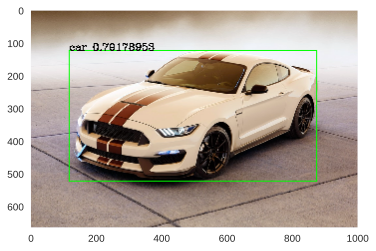

In [119]:
for i in range(len(result)):
  t1=(result[i]['topleft']['x'],result[i]['topleft']['y'])
  br=(result[i]['bottomright']['x'],result[i]['bottomright']['y'])
  label = result[i]['label'] + " " + str(result[i]['confidence'])
  image=cv2.rectangle(image,t1,br,(0,255,0),2)
  image=cv2.putText(image,label,t1,cv2.FONT_HERSHEY_COMPLEX,1,(0,0,0),2)
plt.imshow(image)
plt.grid('off')
plt.show()

  